# Лабораторная работа 6. Машинное  обучение  Scikit-learn

Загрузите дата-сет из файла data.xlsx.

In [1]:
import numpy as np
import pandas as pd
df = pd.read_excel('data.xlsx')

Исправьте прочерки в некоторых ячейках. 

In [2]:
df.replace('-','0',inplace=True)
df.fillna(0,inplace=True)
df.dtypes

Матч      int64
C1        int64
C2        int64
C3       object
C4        int64
C5       object
C6       object
C7      float64
C8       object
C9        int64
C10       int64
C11       int64
C12       int64
C13       int64
C14       int64
C15       int64
C16      object
C17       int64
C18       int64
C19       int64
C20       int64
C21       int64
C22       int64
C23       int64
C24       int64
C25       int64
C26      object
C27       int64
C28      object
C29       int64
C30       int64
C31      object
C32      object
C33      object
C34      object
C35      object
dtype: object

Теперь создадим y и X для тренировки моделей: y (выигрыш\проигрыш) - то, что будем предсказывать, X (все остальные переменые) - по чему будем предсказывать. 

In [3]:
from patsy import dmatrices
from sklearn.model_selection import train_test_split


formula = ''
for column in df.columns[3:]:
    if df[column].dtype == 'int64':
        formula += column + '+'

formula = df.columns[2] + '~' + formula[:-1]

def test_train(formula, df):
    y,X = dmatrices(formula,df, return_type="dataframe")
    y = pd.np.ravel(y)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    return y, X, X_train, X_test, y_train, y_test

y, X, X_train, X_test, y_train, y_test = test_train(formula, df)

Создадим список с моделями, которые будем тестировать и потренируем их. Используем первые 24 строки. В 25й строке записан проверочный тест. 

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

models = []
models.append(LogisticRegression())
models.append(RandomForestClassifier(n_estimators=100, criterion='entropy'))
models.append(GradientBoostingClassifier(max_depth =4))
models.append(GaussianNB())

for model in models:
    model.fit(X_train, y_train)

c:\users\vadim\appdata\local\programs\python\python35\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


Далее выведем кривые-ошибок.

In [5]:
from sklearn.metrics import roc_curve,auc
import ml_metrics
import matplotlib.pyplot as plt
%matplotlib inline

def roc_comparison(models, X_train, X_test, y_train, y_test):
    plt.figure(figsize=(10, 10)) 
    for model in models:
        pred_scr = model.predict_proba(X_test)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test, pred_scr)
        roc_auc = ml_metrics.auc(y_test,pred_scr)
        md = str(model)
        md = md[:md.find('(')]
        plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

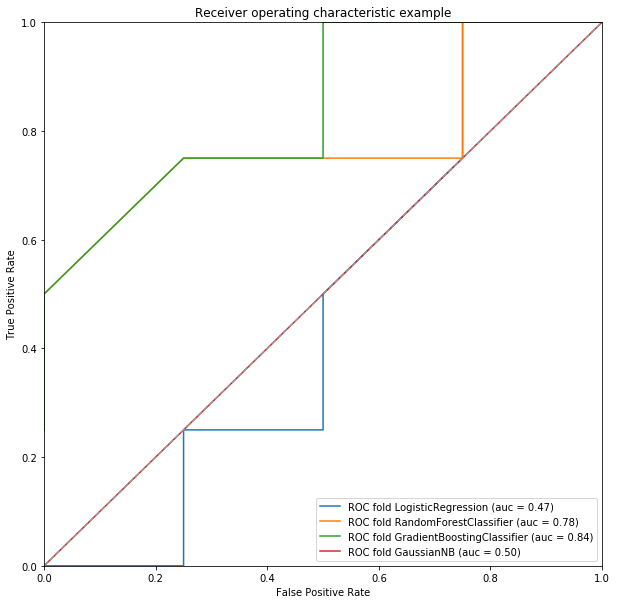

In [6]:
roc_comparison(models, X_train, X_test, y_train, y_test)

Я не знаю насколько я прав, что решил в formula загонять столбцы начиная с 3-го. Поэтому я еще сделал вариант начиная с 1-го столбца **:)**

In [7]:
formula1 = ''
for column in df.columns[1:]:
    if df[column].dtype == 'int64':
        formula1 += column + '+'

formula1 = df.columns[2] + '~' + formula1[:-1]

def test_train(formula1, df):
    y1,X1 = dmatrices(formula1,df, return_type="dataframe")
    y1 = pd.np.ravel(y1)
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X1, y1, test_size=0.3, random_state=0)
    return y1, X1, X_train_1, X_test_1, y_train_1, y_test_1

y1, X1, X_train_1, X_test_1, y_train_1, y_test_1 = test_train(formula1, df)

In [8]:
models1 = []
models1.append(LogisticRegression())
models1.append(RandomForestClassifier(n_estimators=100, criterion='entropy'))
models1.append(GradientBoostingClassifier(max_depth =4))
models1.append(GaussianNB())

for model in models1:
    model.fit(X_train_1, y_train_1)

In [9]:
def roc_comparison(models1, X_train_1, X_test_1, y_train_1, y_test_1):
    plt.figure(figsize=(10, 10)) 
    for model in models1:
        pred_scr = model.predict_proba(X_test_1)[:,1]
        fpr, tpr, thresholds = roc_curve(y_test_1, pred_scr)
        roc_auc = ml_metrics.auc(y_test_1,pred_scr)
        md = str(model)
        md = md[:md.find('(')]
        plt.plot(fpr, tpr, label='ROC fold %s (auc = %0.2f)' % (md, roc_auc))

    plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6))
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

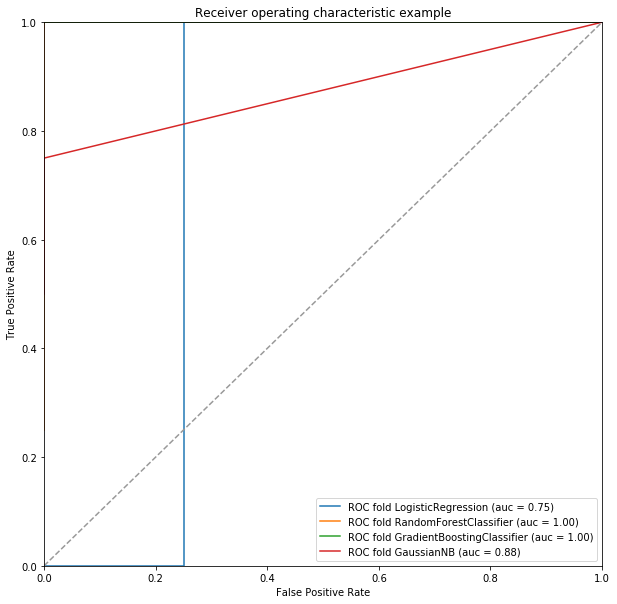

In [10]:
roc_comparison(models1, X_train_1, X_test_1, y_train_1, y_test_1)

Сделаю функцию, которая будет выводить 100% stacked bar chart, чтобы увидеть тенденции. 

In [11]:
def stack_hundred(column):
    test = df.groupby([column,'Матч'])['Матч'].count().unstack()
    print(df.groupby(['Матч',column])['Матч'].count().unstack())
    test.div(test.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True).plot(kind='bar', stacked=True)

Вызовите функцию для каждой из ситуаций. 

1) Количество купленных на матч билетов 

2) Дома(1) или в гостях(0)

3) Место команды соперника в турнирной таблице выше середины(0) или ниже(1)

4) Количество проведённых матчей за последнюю неделю

5) Выиграли(1) или проиграли(0) предыдущую игру

6) Положительная(1) или отрицательная(0) статистика игр с этой командой

7) Данную игру выиграли(1) или проиграли (0)

8) Играл(1) или нет(0) игрок Выборочно, наиболее интересные


C1    119   150   180   228   500   561   580   652   676   680   ...   1100  \
Матч                                                              ...          
1      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
2      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
3      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
4      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
5      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
6      NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN  ...    NaN   
7      NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
8      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
9      1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  ...    NaN   
10     NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN  ...    NaN   
11     NaN   NaN   NaN   NaN   NaN   NaN

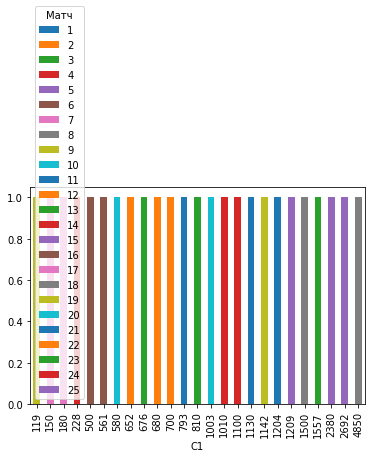

In [12]:
stack_hundred('C1')

Здесь мы видим, что на 9-ый матч было куплено меньше всего билетов. А на 18-ый матч было куплено большего всего билетов.

C2      0    1
Матч          
1     1.0  NaN
2     1.0  NaN
3     NaN  1.0
4     NaN  1.0
5     NaN  1.0
6     1.0  NaN
7     1.0  NaN
8     1.0  NaN
9     1.0  NaN
10    1.0  NaN
11    NaN  1.0
12    NaN  1.0
13    NaN  1.0
14    1.0  NaN
15    NaN  1.0
16    1.0  NaN
17    1.0  NaN
18    1.0  NaN
19    NaN  1.0
20    NaN  1.0
21    NaN  1.0
22    NaN  1.0
23    1.0  NaN
24    1.0  NaN
25    NaN  1.0


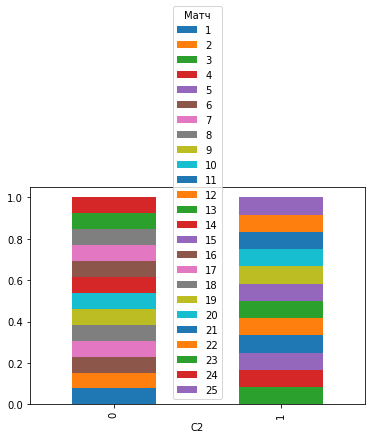

In [13]:
stack_hundred('C2')

Здесь слева - в гостях(0), справа - дома(1).

C3      0    1    0
Матч               
1     NaN  NaN  1.0
2     NaN  NaN  1.0
3     NaN  NaN  1.0
4     NaN  NaN  1.0
5     NaN  NaN  1.0
6     NaN  NaN  1.0
7     NaN  NaN  1.0
8     NaN  NaN  1.0
9     NaN  NaN  1.0
10    NaN  NaN  1.0
11    NaN  NaN  1.0
12    NaN  NaN  1.0
13    NaN  NaN  1.0
14    NaN  1.0  NaN
15    1.0  NaN  NaN
16    NaN  1.0  NaN
17    NaN  1.0  NaN
18    1.0  NaN  NaN
19    NaN  1.0  NaN
20    1.0  NaN  NaN
21    NaN  1.0  NaN
22    NaN  1.0  NaN
23    1.0  NaN  NaN
24    1.0  NaN  NaN
25    1.0  NaN  NaN


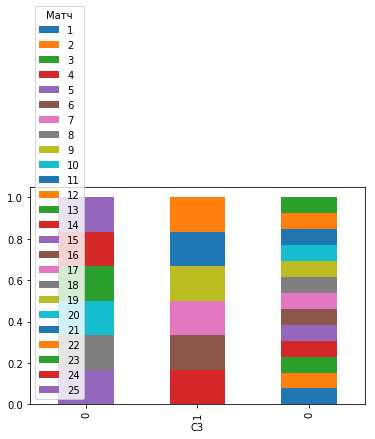

In [14]:
stack_hundred('C3')

Команды **14,16,17,19,21,22** находятся ниже середины турнирной таблицы, а все остальные соотвественно выше.

C4      0    1    2    3
Матч                    
1     1.0  NaN  NaN  NaN
2     NaN  1.0  NaN  NaN
3     NaN  NaN  1.0  NaN
4     NaN  NaN  1.0  NaN
5     NaN  NaN  NaN  1.0
6     NaN  NaN  NaN  1.0
7     NaN  NaN  NaN  1.0
8     NaN  NaN  NaN  1.0
9     NaN  NaN  NaN  1.0
10    NaN  NaN  1.0  NaN
11    NaN  1.0  NaN  NaN
12    NaN  NaN  1.0  NaN
13    NaN  NaN  1.0  NaN
14    NaN  NaN  1.0  NaN
15    NaN  NaN  1.0  NaN
16    NaN  NaN  NaN  1.0
17    NaN  NaN  NaN  1.0
18    NaN  NaN  NaN  1.0
19    NaN  NaN  NaN  1.0
20    NaN  NaN  NaN  1.0
21    1.0  NaN  NaN  NaN
22    NaN  1.0  NaN  NaN
23    NaN  NaN  1.0  NaN
24    NaN  NaN  1.0  NaN
25    NaN  NaN  1.0  NaN


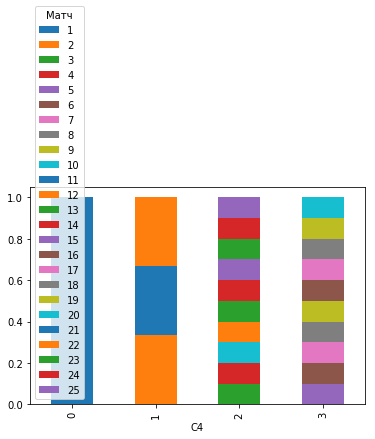

In [15]:
stack_hundred('C4')

**1-я и 21-я** команды не провели ни одного матча, а команды **5,6,7,8,9,16,17,18,19,20** провели больше всех матчей(т.е - 3).
**2,11,22** - эти команды провели по матчу каждая, все остальные по два матча.

C5      0    1    0
Матч               
1     NaN  NaN  1.0
2     NaN  1.0  NaN
3     1.0  NaN  NaN
4     NaN  1.0  NaN
5     NaN  1.0  NaN
6     NaN  1.0  NaN
7     NaN  1.0  NaN
8     NaN  1.0  NaN
9     NaN  1.0  NaN
10    NaN  1.0  NaN
11    1.0  NaN  NaN
12    NaN  1.0  NaN
13    NaN  1.0  NaN
14    NaN  1.0  NaN
15    NaN  1.0  NaN
16    1.0  NaN  NaN
17    NaN  1.0  NaN
18    NaN  1.0  NaN
19    NaN  1.0  NaN
20    NaN  1.0  NaN
21    NaN  1.0  NaN
22    NaN  1.0  NaN
23    NaN  1.0  NaN
24    NaN  1.0  NaN
25    NaN  1.0  NaN


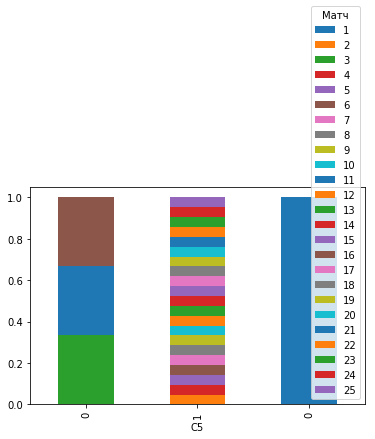

In [16]:
stack_hundred('C5')

Как мы можем видеть команды **1,3,11,16** проиграли свою предыдущую игру, а все остальные соотвественно победили.

C6      0    1    0
Матч               
1     NaN  NaN  1.0
2     NaN  NaN  1.0
3     NaN  NaN  1.0
4     NaN  NaN  1.0
5     NaN  1.0  NaN
6     NaN  NaN  1.0
7     NaN  NaN  1.0
8     NaN  1.0  NaN
9     NaN  NaN  1.0
10    NaN  NaN  1.0
11    NaN  NaN  1.0
12    NaN  NaN  1.0
13    NaN  NaN  1.0
14    NaN  1.0  NaN
15    1.0  NaN  NaN
16    NaN  1.0  NaN
17    NaN  1.0  NaN
18    1.0  NaN  NaN
19    NaN  1.0  NaN
20    1.0  NaN  NaN
21    NaN  1.0  NaN
22    NaN  1.0  NaN
23    NaN  1.0  NaN
24    NaN  1.0  NaN
25    1.0  NaN  NaN


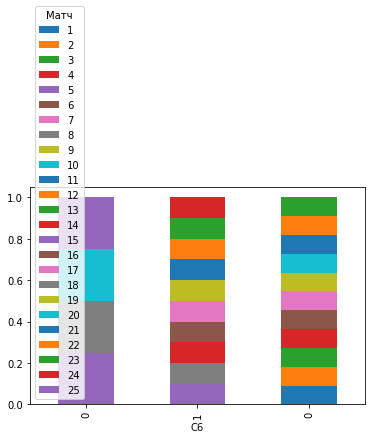

In [17]:
stack_hundred('C6')

Положительная статистика, как мы можем видеть, только у команд **5,8,14,16,17,19,21,22,23,24.** У всех остальных - отрицательная.

C7    0.0  1.0
Матч          
1     NaN  1.0
2     1.0  NaN
3     NaN  1.0
4     NaN  1.0
5     NaN  1.0
6     NaN  1.0
7     NaN  1.0
8     NaN  1.0
9     NaN  1.0
10    1.0  NaN
11    NaN  1.0
12    NaN  1.0
13    NaN  1.0
14    NaN  1.0
15    1.0  NaN
16    NaN  1.0
17    NaN  1.0
18    NaN  1.0
19    NaN  1.0
20    NaN  1.0
21    NaN  1.0
22    NaN  1.0
23    NaN  1.0
24    NaN  1.0
25    1.0  NaN


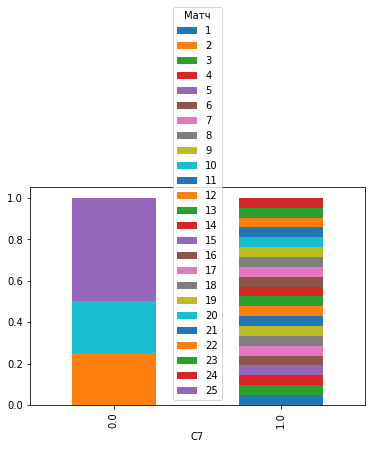

In [18]:
stack_hundred('C7')

Данную игру проиграли только команды **2,10,15,25.** У всех остальных команд победа.

C13     0    1
Матч          
1     NaN  1.0
2     NaN  1.0
3     NaN  1.0
4     NaN  1.0
5     NaN  1.0
6     NaN  1.0
7     NaN  1.0
8     NaN  1.0
9     NaN  1.0
10    NaN  1.0
11    NaN  1.0
12    NaN  1.0
13    NaN  1.0
14    NaN  1.0
15    NaN  1.0
16    NaN  1.0
17    NaN  1.0
18    NaN  1.0
19    NaN  1.0
20    NaN  1.0
21    1.0  NaN
22    1.0  NaN
23    1.0  NaN
24    NaN  1.0
25    NaN  1.0


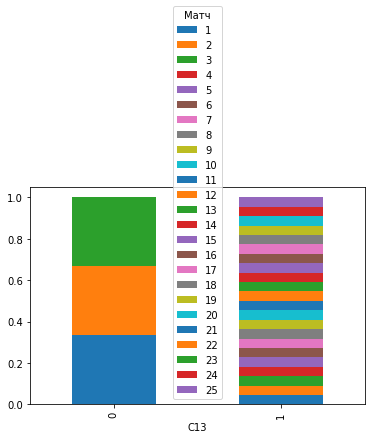

In [19]:
stack_hundred('C13')

Игрок **Жидких** не играл только 3 матча, все остальные он играл.

C24     0    1
Матч          
1     NaN  1.0
2     NaN  1.0
3     NaN  1.0
4     NaN  1.0
5     NaN  1.0
6     NaN  1.0
7     NaN  1.0
8     NaN  1.0
9     NaN  1.0
10    NaN  1.0
11    NaN  1.0
12    NaN  1.0
13    NaN  1.0
14    NaN  1.0
15    NaN  1.0
16    NaN  1.0
17    NaN  1.0
18    NaN  1.0
19    NaN  1.0
20    NaN  1.0
21    NaN  1.0
22    NaN  1.0
23    1.0  NaN
24    1.0  NaN
25    1.0  NaN


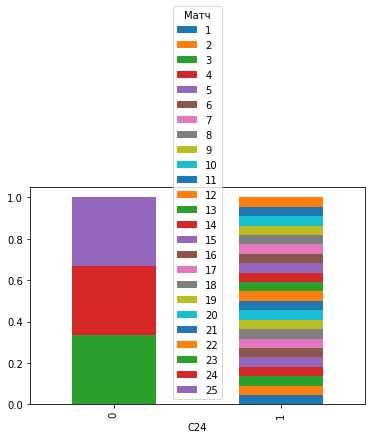

In [20]:
stack_hundred('C24')

Мы также можем наблюдать что игрок **Дадонов** не играл только 3 матча.

C32     1    0
Матч          
1     NaN  1.0
2     NaN  1.0
3     NaN  1.0
4     NaN  1.0
5     NaN  1.0
6     NaN  1.0
7     NaN  1.0
8     NaN  1.0
9     NaN  1.0
10    NaN  1.0
11    NaN  1.0
12    NaN  1.0
13    NaN  1.0
14    NaN  1.0
15    1.0  NaN
16    1.0  NaN
17    1.0  NaN
18    1.0  NaN
19    1.0  NaN
20    1.0  NaN
21    1.0  NaN
22    1.0  NaN
23    1.0  NaN
24    1.0  NaN
25    1.0  NaN


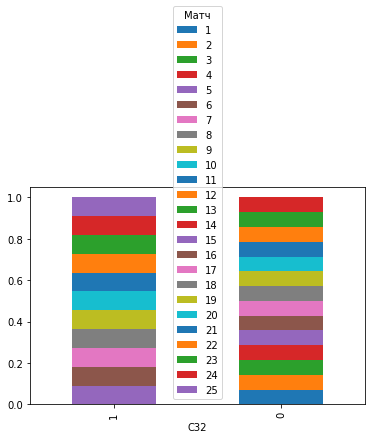

In [21]:
stack_hundred('C32')

Игрок **Горбаченко** играл 11 матчей, а не играл 14.

C18   1
Матч   
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
20    1
21    1
22    1
23    1
24    1
25    1


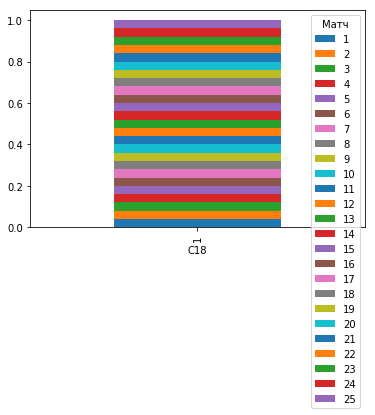

In [22]:
stack_hundred('C18')

Игрок **Лаакконен** играл все матчи.

C27     0    1
Матч          
1     NaN  1.0
2     NaN  1.0
3     NaN  1.0
4     NaN  1.0
5     NaN  1.0
6     NaN  1.0
7     NaN  1.0
8     NaN  1.0
9     NaN  1.0
10    NaN  1.0
11    NaN  1.0
12    NaN  1.0
13    1.0  NaN
14    1.0  NaN
15    1.0  NaN
16    1.0  NaN
17    1.0  NaN
18    NaN  1.0
19    NaN  1.0
20    NaN  1.0
21    1.0  NaN
22    1.0  NaN
23    NaN  1.0
24    NaN  1.0
25    1.0  NaN


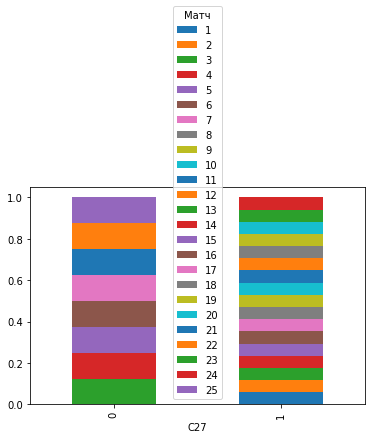

In [23]:
stack_hundred('C27')

Игрок **Казнадей** играл 17 матчей, а не играл 8.

Учитывая незначительные критерии, изменим формулу для создания тестовых и тренировочных сетов, обучим модели заново и сравним с первыми.

In [24]:
formula2 ='C2~C9+C12+C13+C16+C17+C20+C21+C25+C28+C29+C31'

In [25]:
y2, X2, X_train2, X_test2, y_train2, y_test2 = test_train(formula2, df)

In [26]:
models2 = []
models2.append(LogisticRegression())
models2.append(RandomForestClassifier(n_estimators=100, criterion='entropy'))
models2.append(GradientBoostingClassifier(max_depth =4))
models2.append(GaussianNB())
for model in models2:
    model.fit(X_train2, y_train2)

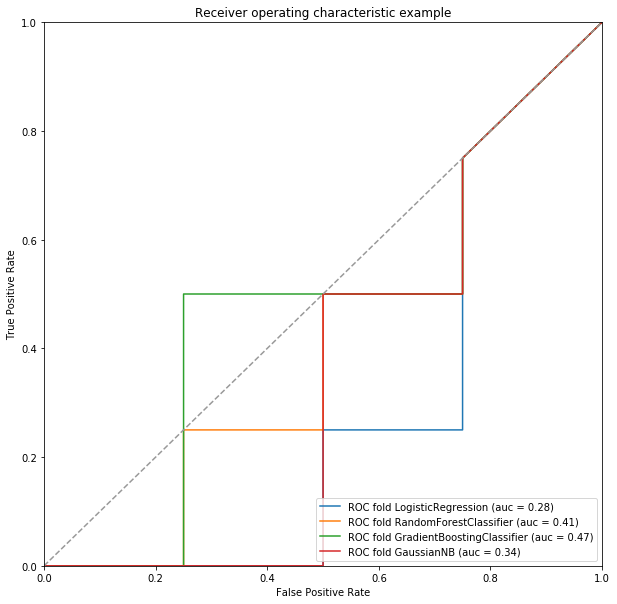

In [27]:
roc_comparison(models2, X_train2, X_test2, y_train2, y_test2)

Вывод.

*Логистическая регрессия* показала себя хуже остальных, а лучшей оказалось *Повышение градиента*